
#  Student Project Showcase — SSC Exam Result Analysis

Hi everyone! I'm **Muhammad Ikram**, a Software Engineering student with a strong passion for **Data Science** and **Machine Learning**.

As part of my self-learning journey, I conducted an in-depth analysis of **real SSC (Secondary School Certificate) exam result data**. The goal was to extract meaningful insights that could help educators, institutions, and stakeholders better understand student performance trends.

##  Key Insights from the Analysis:

*  **Pass vs Fail Student Distributions** — Understand the overall success and failure rates.
*  **Most Failed Subjects** — Identify subjects where students are struggling the most.
*  **Subject-wise Fail Correlations** — Discover which subjects are often failed together.
*  **Fine Overview** — Analyze the frequency and patterns of imposed fines.
*  **Cancelled Exam Overview** — Review trends in cancelled or withdrawn subjects.

These insights can support data-driven decision-making for curriculum improvements, early interventions, and targeted academic support.

## Tools & Technologies Used

* `Python`
* `Pandas`
* `Seaborn`
* `Matplotlib`


##  Project Links

*  **GitHub Repository**: [github.com/ikram-3/ssc-exam-analysis](https://github.com/ikram-3/ssc-exam-analysis)
*  **Dataset (CSV)**: [Download SSC Result Dataset](https://raw.githubusercontent.com/ikram-3/ssc-exam-analysis/main/SSC.csv)

##  Let's Connect

I'm excited to grow in the field of data science and collaborate on meaningful projects. If you’re working on something similar or would like to discuss this project, feel free to connect!



# 📊 SSC Exam Data Analysis


analyzes student performance in SSC exams. We calculate:
- Total students appeared
- Number of students passed and failed
- Most failed subjects



### Loading the Dataset
>This section imports the required Python libraries (pandas, matplotlib.pyplot, seaborn, and Counter from collections) for data analysis and visualization. It then loads the SSC exam dataset from the file SSC.csv into a pandas DataFrame and displays the first five rows to provide a quick overview of the data structure.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv("SSC.csv")
df.head()


,ROLL_NO,NAME,FATHER_NAME,MARKS,GRADE,REMARKS
0,100001,JALWA BIBI,ALAM ZEB,NaN,NaN,"PS-I,M-I,PH-I,CH-I,"
1,100002,IQRA AYAZ,MUHAMMAD AYAZ,NaN,NaN,"PS-I,PH-I,CH-I,"
2,100003,UROOJ MALIK,GUL MALIK,NaN,NaN,"PH-I,CH-I,"
3,100004,MUSKAN BIBI,RAHMAN ALI,NaN,NaN,"IC-I,PS-I,M-I,PH-I,CH-I,"
4,100005,KASHMALA BEGUM,RIAZ UD DIN,NaN,NaN,"IC-I,PS-I,M-I,CH-I,BIO-1,"


### Calculating Pass and Fail Statistics
> This section creates a new column Status in the DataFrame to classify students as 'Pass' or 'Fail' based on whether their GRADE is non-null (indicating a pass). It then computes the total number of students, the number of students who passed, and the number who failed, printing these statistics for a clear summary.

In [76]:

df['Status'] = df['GRADE'].apply(lambda x: 'Pass' if pd.notna(x) else 'Fail')

total_students = df.shape[0]
status_counts = df['Status'].value_counts()

print("Total Students:", total_students)
print("Passed:", status_counts['Pass'])
print("Failed:", status_counts['Fail'])


Total Students: 98782
Passed: 59593
Failed: 39189


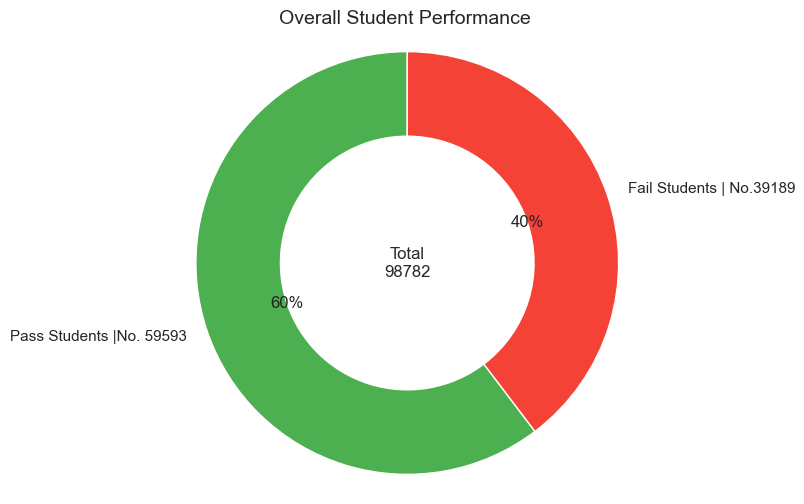

In [125]:
plt.figure(figsize=(6, 6))
plt.pie(
    x=[status_counts["Pass"], status_counts["Fail"]],
    labels=["Pass Students |No. 59593", "Fail Students | No.39189"],
    autopct="%1.0f%%",
    startangle=90,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    colors=["#4CAF50", "#F44336"] 
)

plt.text(0, 0, f'Total\n{status_counts.sum()}', ha='center', va='center', fontsize=12)

plt.title("Overall Student Performance ", fontsize=14)
plt.axis('equal') 
plt.show()


C:\Users\ikram\AppData\Local\Temp\ipykernel_21392\1633871303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")


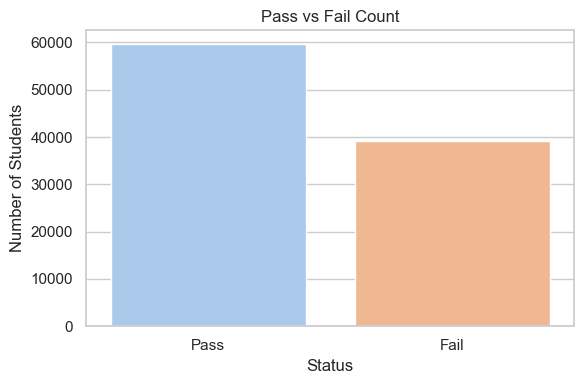

In [78]:

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")
plt.title("Pass vs Fail Count")
plt.ylabel("Number of Students")
plt.xlabel("Status")
plt.tight_layout()
plt.show()


### Analyzing Subject Failure Combinations
> This section uses the itertools.combinations and collections.Counter to identify and count pairs of subjects that students failed together. It processes the failed_subjects data (assumed to be a list of subject lists from the REMARKS column) to generate combinations of failed subjects and stores the counts in a dictionary for further analysis.

In [128]:

failed_subjects = df[df['Status'] == 'Fail']['REMARKS'].dropna().str.split(',')

flat_subjects = [subject.strip() for sublist in failed_subjects for subject in sublist if subject.strip()]
subject_failures = Counter(flat_subjects)

subject_df = pd.DataFrame(subject_failures.items(), columns=['Subject', 'Failures']).sort_values(by='Failures', ascending=False)
subject_df.head(15)


,Subject,Failures
3,CH-I,19107
4,IC-I,12383
2,PH-I,10816
6,E-I,9938
1,M-I,8797
5,BIO-1,8433
0,PS-I,4651
9,GM-I,4351
42,M-II,3147
45,CH-II,2730


C:\Users\ikram\AppData\Local\Temp\ipykernel_21392\3483190184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subject_df.head(10), x='Subject', y='Failures', palette='Reds_r')


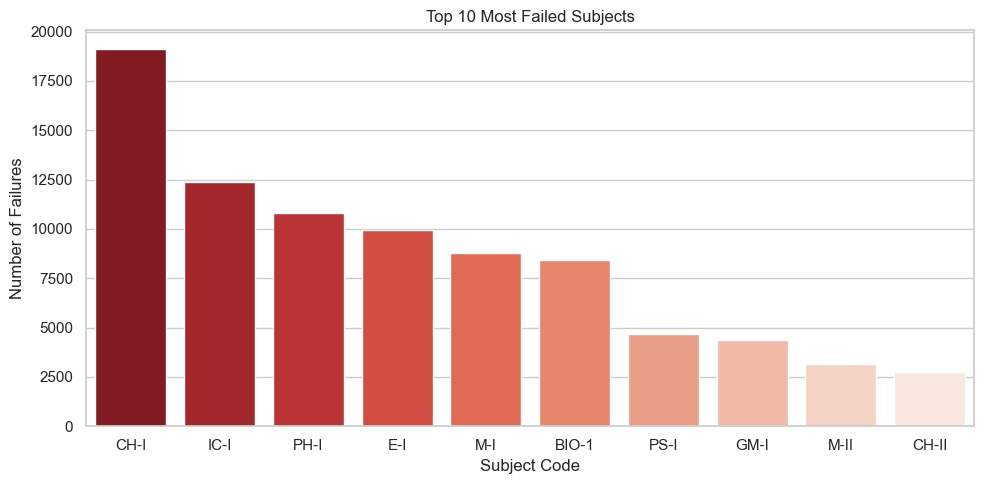

In [80]:

plt.figure(figsize=(10,5))
sns.barplot(data=subject_df.head(10), x='Subject', y='Failures', palette='Reds_r')
plt.title("Top 10 Most Failed Subjects")
plt.xlabel("Subject Code")
plt.ylabel("Number of Failures")
plt.tight_layout()
plt.show()


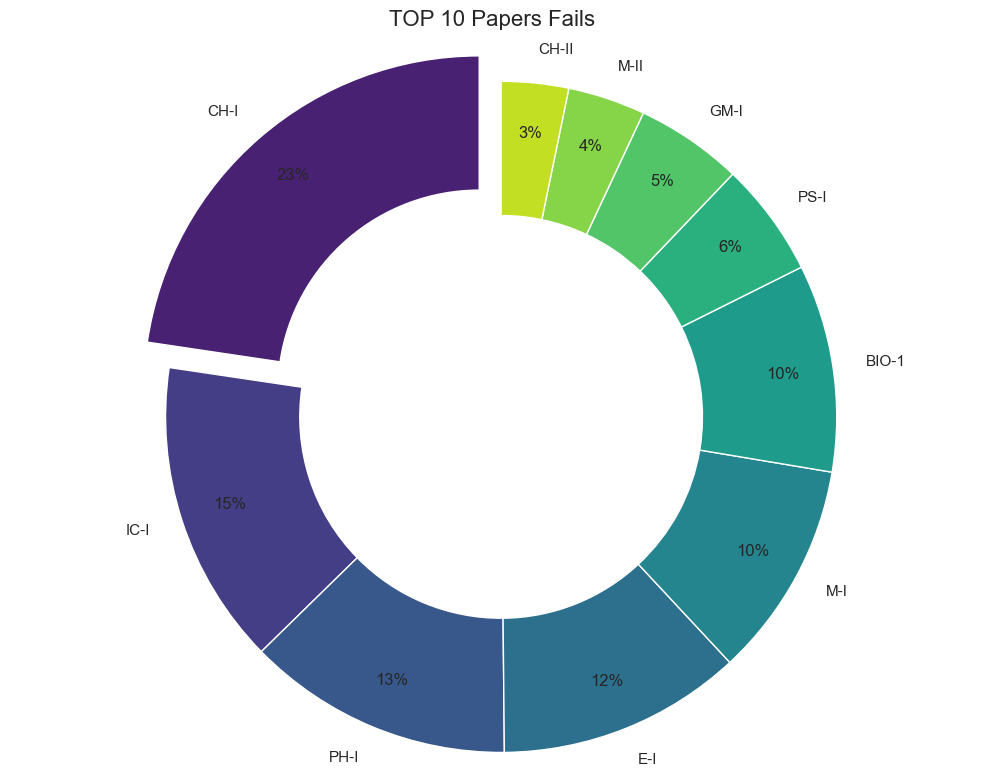

Highest Fails Remark: CH-I with a count of 19107


In [81]:

import numpy as np 
failed_subjects = df[df['Status'] == 'Fail']['REMARKS'].dropna().str.split(',')

all_subjects = [sub.strip() for sublist in failed_subjects for sub in sublist if sub.strip()]

subject_counts = Counter(all_subjects)

fail_subject = pd.DataFrame(subject_counts.items(), columns=['REMARKS', 'count'])
fail_subject = fail_subject.sort_values(by='count', ascending=False).reset_index(drop=True)

top_10_counts = fail_subject['count'].head(10)
top_10_remarks = fail_subject['REMARKS'].head(10)
max_index = np.argmax(top_10_counts)

explode = [0] * len(top_10_counts)
explode[max_index] = 0.1

plt.figure(figsize=(10, 8))
wedge_props = {'width': 0.4, 'edgecolor': 'white'}

plt.pie(
    top_10_counts,
    labels=top_10_remarks,
    autopct="%1.0f%%",
    startangle=90,
    colors=sns.color_palette('viridis', len(top_10_counts)),
    pctdistance=0.85,
    wedgeprops=wedge_props,
    explode=explode
)

plt.title("TOP 10 Papers Fails", fontsize=16)
plt.axis('equal')  
plt.tight_layout()
plt.show()

highest_remark = top_10_remarks.iloc[max_index]
highest_count = top_10_counts.iloc[max_index]
print(f"Highest Fails Remark: {highest_remark} with a count of {highest_count}")


In [82]:
top_names = df['NAME'].value_counts().head(10).drop("NAME")
pd.DataFrame(top_names).reset_index()

,NAME,count
0,ABDULLAH,352
1,SALMAN KHAN,263
2,SUDAIS KHAN,224
3,HAMZA KHAN,224
4,UBAID ULLAH,218
5,SANA ULLAH,217
6,AWAIS KHAN,217
7,ABBAS KHAN,216
8,INAM ULLAH,212


In [83]:
df['Failed_Subject_Count'] = df['REMARKS'].dropna().apply(lambda x: len(x.split(',')))
df

,ROLL_NO,NAME,FATHER_NAME,MARKS,GRADE,REMARKS,Status,Failed_Subject_Count
0,100001,JALWA BIBI,ALAM ZEB,NaN,NaN,"PS-I,M-I,PH-I,CH-I,",Fail,5.0
1,100002,IQRA AYAZ,MUHAMMAD AYAZ,NaN,NaN,"PS-I,PH-I,CH-I,",Fail,4.0
2,100003,UROOJ MALIK,GUL MALIK,NaN,NaN,"PH-I,CH-I,",Fail,3.0
3,100004,MUSKAN BIBI,RAHMAN ALI,NaN,NaN,"IC-I,PS-I,M-I,PH-I,CH-I,",Fail,6.0
4,100005,KASHMALA BEGUM,RIAZ UD DIN,NaN,NaN,"IC-I,PS-I,M-I,CH-I,BIO-1,",Fail,6.0
...,...,...,...,...,...,...,...,...
98777,283958,Naeem Ullah,Bakht sher Ali,NaN,NaN,"PH-I,M-II,PH-II,",Fail,4.0
98778,283959,SHEHBAZ GHANI,FAZAL GHANI,535,D,NaN,Pass,NaN
98779,283960,Humira Bibi,Shafiq Ahmad,NaN,NaN,"PH-I,IC-II,MQ-II,",Fail,4.0
98780,283961,USMAN ALI,MUHAMMAD IQBAL,NaN,NaN,"IC-II,PS-II,",Fail,3.0


In [84]:
df['Class_Level'] = df['REMARKS'].apply(lambda x: '9th' if 'CH-I' in str(x) or 'PH-I' in str(x) else '10th')
class_grouped = df.groupby(['Class_Level', 'Status']).size()
class_grouped

Class_Level  Status
10th         Fail      14348
             Pass      59593
9th          Fail      24841
dtype: int64

In [85]:
df['NumFailedSubjects'] = df['REMARKS'].dropna().apply(lambda x: len(x.split(',')))
one_fail = df[df['NumFailedSubjects'] == 1]
multi_fail = df[df['NumFailedSubjects'] >= 5]


### Fine Student
> This section modifies the REMARKS column in the fine DataFrame to extract the last element from the comma-separated values in each row. This step focuses on identifying students who were fined, as the last element in the REMARKS column likely contains fine-related information. The processed data will help analyze the fines imposed on students for specific reasons.

In [118]:
fine = df[df['REMARKS'].str.contains("RS",na=True,case=True,)]
fine['REMARKS'].fillna(0,inplace=True)
fine = fine[fine['REMARKS'] !=0]


C:\Users\ikram\AppData\Local\Temp\ipykernel_21392\93648856.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fine['REMARKS'].fillna(0,inplace=True)
C:\Users\ikram\AppData\Local\Temp\ipykernel_21392\93648856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine['REMARKS'].fillna(0,inplace=True)


In [113]:
fine['REMARKS'] = fine['REMARKS'].str.split(",").str.get(-1)

In [114]:
fine

,ROLL_NO,NAME,FATHER_NAME,MARKS,GRADE,REMARKS,Status,Failed_Subject_Count,Class_Level,NumFailedSubjects
50182,182716,HAZRAT USMAN,TOTI,NaN,NaN,Fee Receipt RS: 2200/-,Fail,10.0,10th,10.0
56416,206853,Laiba Syed,Farooq Syed,764,B,DUES RS:2500 LATE IMP/-,Pass,1.0,10th,1.0
98596,283776,UZMA ALI,ALI AKBAR,NaN,NaN,ORG RS:4700/-,Fail,2.0,10th,2.0
98654,283833,JAWERIA AHMAD,SHABIR AHMAD,NaN,NaN,Exam FEE RS:5100/-,Fail,3.0,9th,3.0
98772,283953,MUSKAN,SHER MUHAMMAD,NaN,NaN,LET OFF FINED RS.1500/-,Fail,1.0,10th,1.0


### Cancel Exam And Paper
>This section filters the DataFrame to find students whose exam records were canceled, as indicated by the term "Cancel" in the REMARKS column. It handles missing values in REMARKS by replacing them with 0 and then excludes any rows where REMARKS is 0, ensuring only relevant cancellation records are retained for further analysis.

In [119]:
Cancel = df[df['REMARKS'].str.contains("Cancel",na=True,case=True,)]
Cancel['REMARKS'].fillna(0,inplace=True)
Cancel = Cancel[Cancel['REMARKS'] !=0]


C:\Users\ikram\AppData\Local\Temp\ipykernel_21392\2923601501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cancel['REMARKS'].fillna(0,inplace=True)
C:\Users\ikram\AppData\Local\Temp\ipykernel_21392\2923601501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cancel['REMARKS'].fillna(0,inplace=True)


In [120]:
Cancel

,ROLL_NO,NAME,FATHER_NAME,MARKS,GRADE,REMARKS,Status,Failed_Subject_Count,Class_Level,NumFailedSubjects
8632,125750,TAWHEED BIBI,BAKHT BAIDAR KHAN,NaN,NaN,Four Exam: Cancelled,Fail,1.0,10th,1.0
18502,136237,FARYAL ISMAIL,MUHAMMAD ISMAIL MIAN,NaN,NaN,One Exam: Cancelled,Fail,1.0,10th,1.0
34699,152727,ASAD KHAN,RAHMAN ZADA,NaN,NaN,One Exam: Cancelled,Fail,1.0,10th,1.0
43184,161491,ASAD ULLAH KHAN,YAQOOB KHAN,NaN,NaN,Four Exam: Cancelled,Fail,1.0,10th,1.0
49149,181694,SYED TAWAKKAL KHAN,SYED NAZAR HUSSAIN SHAH,NaN,NaN,Six Exam: Cancelled,Fail,1.0,10th,1.0
57734,220395,haseena bibi,subhan ali shah,NaN,NaN,Four Exam: Cancelled,Fail,1.0,10th,1.0
84608,249159,SALAR KHAN,LIAQAT ALI KHAN,NaN,NaN,Six Exam: Cancelled,Fail,1.0,10th,1.0
86662,251283,Ibad Ullah,Sherin Zada,NaN,NaN,Six Exam: Cancelled,Fail,1.0,10th,1.0
91206,256295,ANSAR FAROOQ,UMAR FAROOQ,NaN,NaN,Paper Cancelled with fine 1500,Fail,1.0,10th,1.0
92507,257699,IRFAN ALI,HAKEEM KHAN,NaN,NaN,One Exam: Cancelled,Fail,1.0,10th,1.0
